In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produto_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')

#usaremos o display para ver todos os dataframes
#display(vendas_df)
#display(produto_df)
#display(lojas_df)
#display(clientes_df)

Matplotlib is building the font cache; this may take a moment.


In [117]:
# aqui usei o comando drop para excluir colunas sem informações.
clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)


In [118]:
#aqui usei o comando RENAME para renomear cabeçalhos das tabelas Produtos, Lojas e Clientes.
produto_df = produto_df.rename(columns={'ÿNome do Produto' : 'Nome do Produto'})
lojas_df = lojas_df.rename(columns={'ÿID Loja' : 'ID Loja'})
clientes_df = clientes_df.rename(columns={'ÿID Cliente' : 'ID Cliente'})


In [119]:
#aqui foi feita uma seleção para que aparecessem apenas algumas colunas das tabale abaixo...
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produto_df = produto_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]


In [120]:
#juntando os dataframes
vendas_df = vendas_df.merge(produto_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')


In [121]:
#vamos renomear o e-mail para ficar claro que é do cliente
vendas_df = vendas_df.rename(columns={'E-mail' : 'E-mail do Cliente'})

#display(vendas_df)

<Axes: xlabel='E-mail do Cliente'>

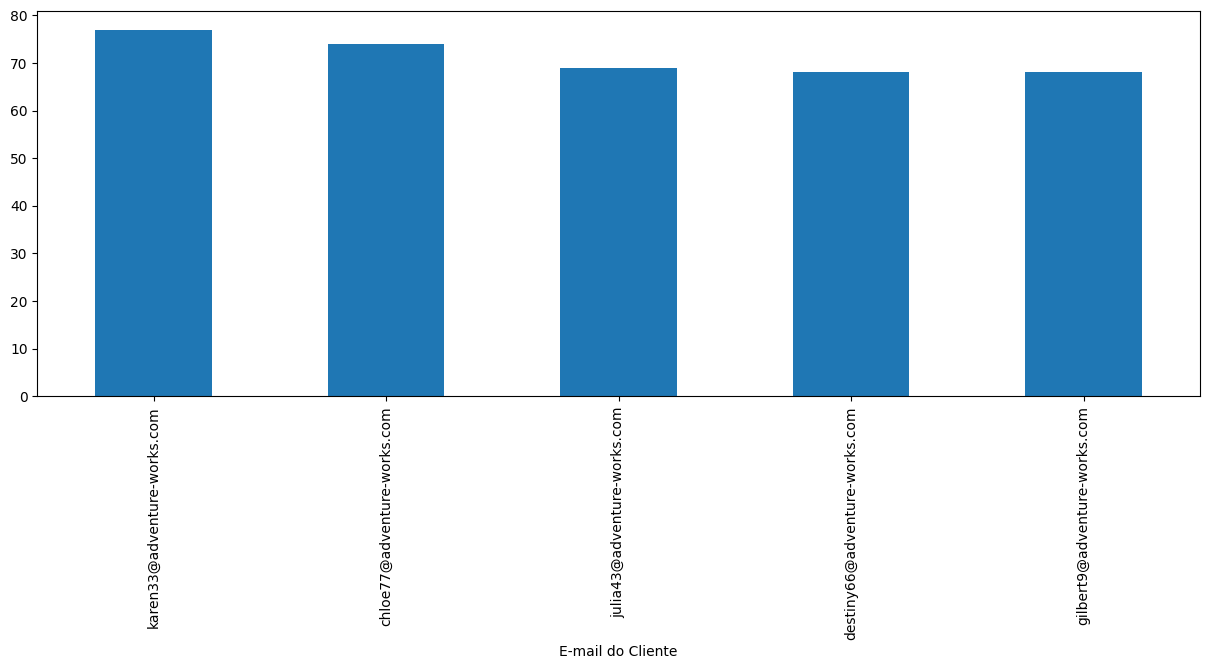

In [126]:
qtde_vendas_clientes = vendas_df['E-mail do Cliente'].value_counts()
qtde_vendas_clientes[:5].plot(figsize=(15, 5), kind='bar')
